# Importing Libraries and Loading datasets

In [562]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression

import joblib

In [563]:
train = pd.read_csv("train.csv", index_col='id')
test = pd.read_csv("test.csv", index_col='id')

# Explore train_data

In [564]:
train.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [565]:
train[['measurement_0', 'measurement_1', 'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16']].describe()

,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16
count,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,25774.000000,25633.000000,25522.000000,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000
mean,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,17.510759,11.716624,19.024714,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727
std,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,0.995980,1.000836,1.008591,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935
min,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,12.715000,7.968000,15.217000,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000
25%,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,16.839000,11.045000,18.340250,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000
50%,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,17.516000,11.712000,19.021000,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000
75%,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,18.178000,12.391000,19.708000,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000
max,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,21.543000,15.419000,23.807000,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000


# Features

In [566]:
train_data = train.drop('failure', axis=1).copy()
test_data = test.copy()

## Numerical Features

In [567]:
numerical_cols = train_data.select_dtypes(np.number).columns.values.tolist()
train_data[numerical_cols].head()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,,
0,80.10,9,5,7,8,4,18.040,12.518,15.748,19.292,...,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100
1,84.89,9,5,14,3,3,18.213,11.540,17.717,17.893,...,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057
2,82.43,9,5,12,1,5,18.057,11.652,16.738,18.240,...,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376
3,101.07,9,5,13,2,6,17.295,11.188,18.576,18.339,...,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282
4,188.06,9,5,9,2,8,19.346,12.950,16.990,15.746,...,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885


## Categorical Features

In [568]:
categorical_cols = [x for x in train_data.columns.values if (x not in numerical_cols)]
train_data[categorical_cols].head()

,product_code,attribute_0,attribute_1
id,,,
0,A,material_7,material_8
1,A,material_7,material_8
2,A,material_7,material_8
3,A,material_7,material_8
4,A,material_7,material_8


# Preprocessing

## Fill Missing Values

In [569]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(train_data[numerical_cols].append(test_data[numerical_cols]))
train_data[numerical_cols] = imputer.transform(train_data[numerical_cols])

## Feature Engineering



In [570]:
# train_data['m_3_missing'] = train_data.measurement_3.isna()
# train_data['m_5_missing'] = train_data.measurement_5.isna()

train_data['attribute_2*3'] = train_data['attribute_2'] * train_data['attribute_3']
numerical_cols = numerical_cols + ['attribute_2*3']

meas_gr1_cols = [f"measurement_{i:d}" for i in list(range(3, 4)) +list(range(5, 7))+ list(range(8, 9))]
train_data['meas_gr1_avg'] = np.mean(train_data[meas_gr1_cols], axis=1)
numerical_cols = numerical_cols + ['meas_gr1_avg']
train_data['meas_gr1_std'] = np.std(train_data[meas_gr1_cols], axis=1)
numerical_cols = numerical_cols + ['meas_gr1_std']

meas_gr2_cols = [f"measurement_{i:d}" for i in list(range(7, 8))+list(range(9, 10))+list(range(13, 14))]
train_data['meas_gr2_avg'] = np.mean(train_data[meas_gr2_cols], axis=1)
numerical_cols = numerical_cols + ['meas_gr2_avg']
train_data['meas_gr2_std'] = np.std(train_data[meas_gr2_cols], axis=1)
numerical_cols = numerical_cols + ['meas_gr2_std']
train_data.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,attribute_2*3,meas_gr1_avg,meas_gr1_std,meas_gr2_avg,meas_gr2_std
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9.0,5.0,7.0,8.0,4.0,18.040,...,15.029,16.081604,13.034,14.684,764.100,45.0,18.30875,1.658696,12.480000,1.854305
1,A,84.89,material_7,material_8,9.0,5.0,14.0,3.0,3.0,18.213,...,14.732,15.425000,14.395,15.631,682.057,45.0,17.92800,0.179229,13.309333,1.013405
2,A,82.43,material_7,material_8,9.0,5.0,12.0,1.0,5.0,18.057,...,16.711,18.631000,14.094,17.946,663.376,45.0,17.83075,0.636760,14.048000,1.883026
3,A,101.07,material_7,material_8,9.0,5.0,13.0,2.0,6.0,17.295,...,15.250,15.562000,16.154,17.172,826.282,45.0,18.31750,0.644999,13.434667,1.284449
4,A,188.06,material_7,material_8,9.0,5.0,9.0,2.0,8.0,19.346,...,16.182,12.760000,13.153,16.412,579.885,45.0,17.54375,1.331195,12.608333,2.557741


## Encoding

In [571]:
for column in categorical_cols:
    label_encoder = LabelEncoder()
    label_encoder.fit(train_data[column].append(test_data[column]))
    train_data[column] = label_encoder.transform(train_data[column])
train_data.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,attribute_2*3,meas_gr1_avg,meas_gr1_std,meas_gr2_avg,meas_gr2_std
id,,,,,,,,,,,,,,,,,,,,,
0,0,80.10,1,3,9.0,5.0,7.0,8.0,4.0,18.040,...,15.029,16.081604,13.034,14.684,764.100,45.0,18.30875,1.658696,12.480000,1.854305
1,0,84.89,1,3,9.0,5.0,14.0,3.0,3.0,18.213,...,14.732,15.425000,14.395,15.631,682.057,45.0,17.92800,0.179229,13.309333,1.013405
2,0,82.43,1,3,9.0,5.0,12.0,1.0,5.0,18.057,...,16.711,18.631000,14.094,17.946,663.376,45.0,17.83075,0.636760,14.048000,1.883026
3,0,101.07,1,3,9.0,5.0,13.0,2.0,6.0,17.295,...,15.250,15.562000,16.154,17.172,826.282,45.0,18.31750,0.644999,13.434667,1.284449
4,0,188.06,1,3,9.0,5.0,9.0,2.0,8.0,19.346,...,16.182,12.760000,13.153,16.412,579.885,45.0,17.54375,1.331195,12.608333,2.557741


# Feature selection

In [572]:
X = train_data.copy()
y = train.failure.copy()

In [573]:
mi_scores = mutual_info_classif(X, y, random_state=1)
mi_scores = pd.Series(mi_scores, name="MI Scores")
mi_scores_classif = mi_scores.sort_values(ascending=False)

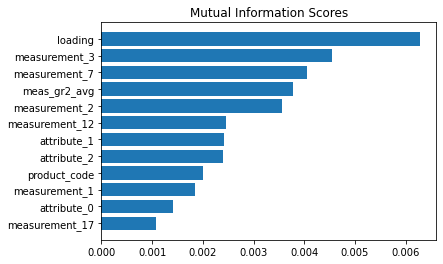

In [574]:
def plot_mi_scores(scores, X):
    scores = scores.sort_values()
    width = np.arange(len(scores))
    ticks = X.columns[scores.index]
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    return ticks
plt.figure()
columns = plot_mi_scores(mi_scores_classif[mi_scores_classif > 1e-3], X)

## Print selected columns to inference

In [575]:
columns = columns.tolist()
print(columns)

['measurement_17', 'attribute_0', 'measurement_1', 'product_code', 'attribute_2', 'attribute_1', 'measurement_12', 'measurement_2', 'meas_gr2_avg', 'measurement_7', 'measurement_3', 'loading']


# Modelling

In [576]:
X = train_data[columns].copy()
y = train.failure.copy()

## Logistic Regression

In [577]:
model = LogisticRegression(C=0.0001, penalty='l2', solver='newton-cg')
model.fit(X,y)
predictions = model.predict_proba(X)[:, 1]
score = roc_auc_score(y, predictions)
print(f"AUC: {score}")

#save model
joblib.dump(model, '109550039_model')

AUC: 0.5918800030417304


['109550039_model']